In [1]:
import xarray
import intake
import util 

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [2]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

cat = col.search(source_id=['GFDL-CM4','CNRM-CM6-1-HR','ECMWF-IFS-HR','HadGEM3-GC31-MM'],
                 experiment_id=['historical'],
                 table_id=['Omon','Oyr'],
                # variable_id=['tos','uo','vo','msftyz','o2'])
                 variable_id=['o2'],
                 grid_label=['gr'], time_range=['185001-186912','199001-200912'])
cat.df

dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})


xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


In [3]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
255135,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,o2,gr,NaN,v20180701,185001-186912,/glade/collections/cmip/CMIP6/CMIP/NOAA-GFDL/G...
255139,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,o2,gr,NaN,v20180701,199001-200912,/glade/collections/cmip/CMIP6/CMIP/NOAA-GFDL/G...


In [4]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {'time':240}, 'decode_times': False})

ds_gr=dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr']

ds_na_gr_t0=ds_gr.isel(lon=slice(285,320),lat=slice(120,150),lev=slice(9,12),time=slice(0,240),member_id=-1)
ds_na_gr_t1=ds_gr.isel(lon=slice(285,320),lat=slice(120,150),lev=slice(9,12),time=slice(241,480),member_id=-1)

In [5]:
o2_t0=ds_na_gr_t0.o2.mean(axis=(0,1))/1035.*1.e6
o2_t1=ds_na_gr_t1.o2.mean(axis=(0,1))/1035.*1.e6
o2_diff=o2_t1-o2_t0
o2_t0.shape

(30, 35)

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


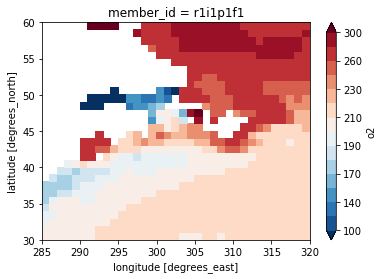

In [34]:
o2_t0.plot(levels=[100,120,140,160,170,180,190,200,210,220,230,240,260,280,300])

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


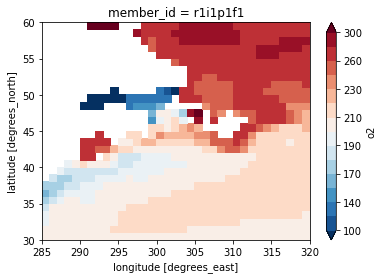

In [39]:
o2_t1.plot(levels=[100,120,140,160,170,180,190,200,210,220,230,240,260,280,300])

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


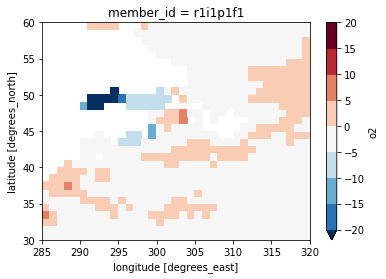

In [10]:
o2_diff.plot(levels=[-20,-15,-10,-5,0,5,10,15,20])